In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
Base_Dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [4]:
Base_Dados.shape

(1034, 9)

In [5]:
Base_Dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

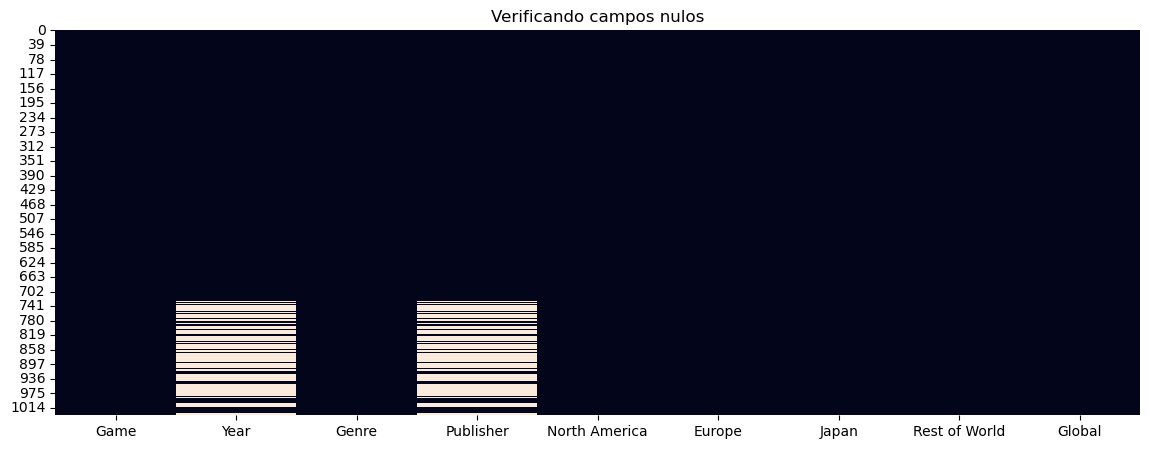

In [6]:
plt.figure(figsize=(14,5))
plt.title('Verificando campos nulos')
sns.heatmap(Base_Dados.isnull(), cbar=False);

In [7]:
Base_Dados.dropna(inplace=True)

In [8]:
Base_Dados.isnull().sum()

Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
dtype: int64

In [9]:
Base_Dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


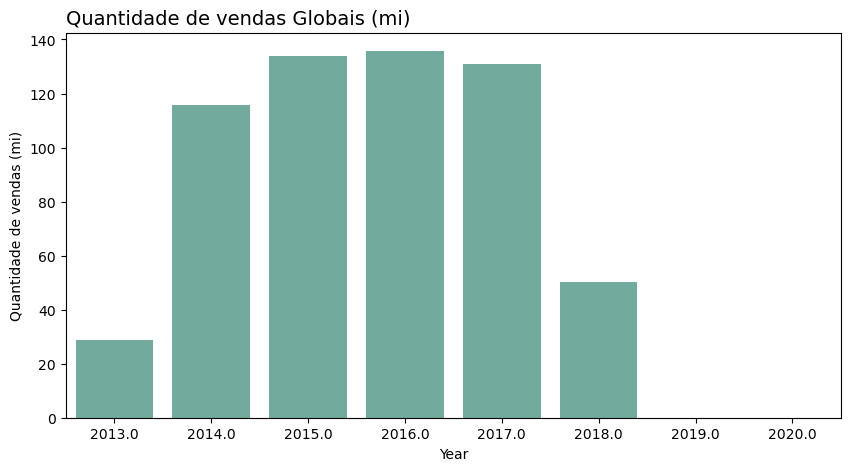

In [10]:
plt.figure(figsize=(10,5))
plt.title('Quantidade de vendas Globais (mi)', loc='left', fontsize=14)
sns.barplot(data=Base_Dados, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum);
plt.ylabel('Quantidade de vendas (mi)');

In [11]:
Base_Dados = Base_Dados.loc[(Base_Dados['Year'] != 2019) & (Base_Dados['Year'] != 2020)]

Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


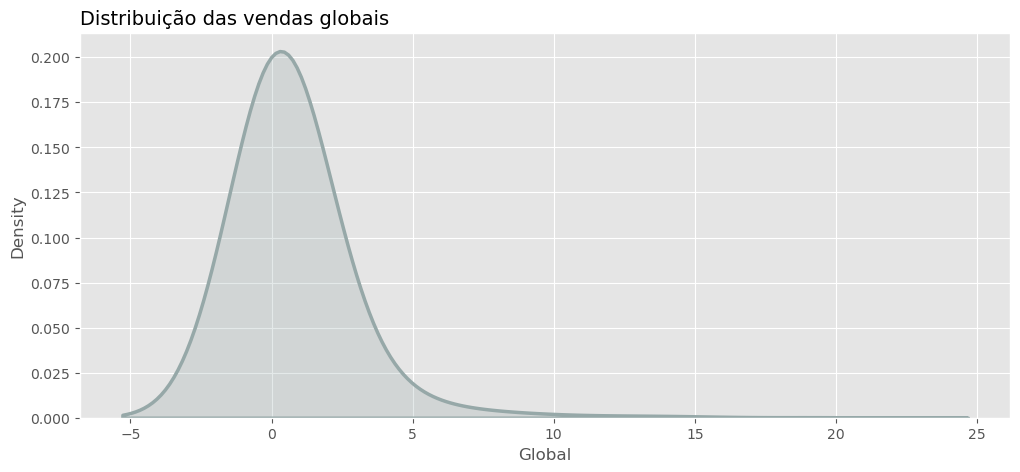

In [12]:
plt.figure(figsize=(12,5))
plt.style.use('ggplot')
plt.title('Distribuição das vendas globais', loc='left', fontsize=14)

sns.kdeplot(Base_Dados['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5);

In [13]:
Analise2 = Base_Dados.groupby(by=['Year']).sum()

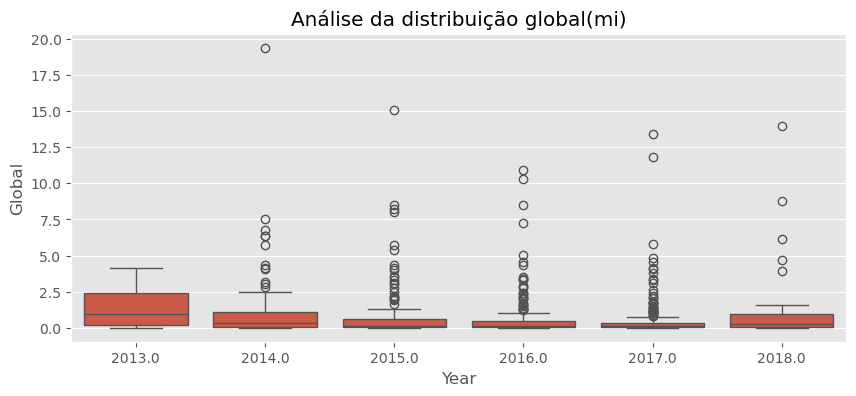

In [14]:
plt.figure(figsize=(10,4))
plt.title('Análise da distribuição global(mi)')

sns.boxplot(data=Base_Dados, x='Year', y='Global');

In [15]:
Base_Dados.loc[Base_Dados['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [16]:
Analise = round(Base_Dados['Genre']).value_counts(normalize=True)

In [17]:
Analise.head() * 100

Genre
Action          25.093168
Role-Playing    12.795031
Shooter          8.944099
Adventure        8.695652
Sports           8.571429
Name: proportion, dtype: float64

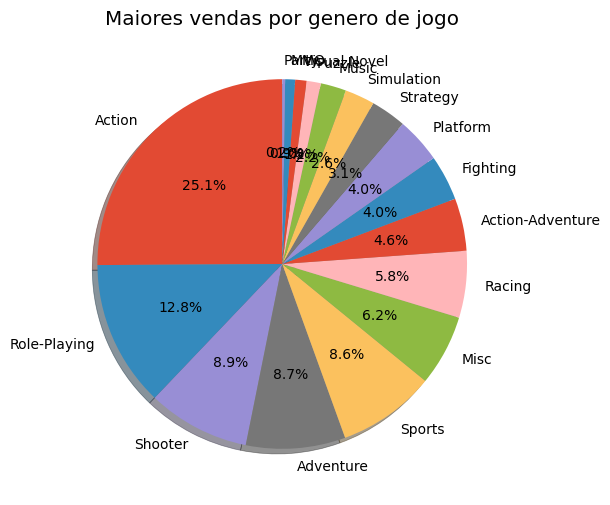

In [18]:
plt.figure( figsize=(15,6) )
plt.title('Maiores vendas por genero de jogo')
plt.pie(
    Analise,
    labels = Analise.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [59]:
Analise2

,Game,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
Year,,,,,,,,
2013.0,Call of Duty: GhostsBattlefield 4FIFA Soccer 1...,ShooterShooterSportsAction-AdventureShooterRac...,ActivisionElectronic ArtsEA SportsUbisoftSony ...,10.35,12.88,0.97,4.57,28.76
2014.0,Grand Theft Auto VCall of Duty: Advanced Warfa...,ActionShooterAction-AdventureMiscSportsShooter...,Rockstar GamesActivisionSony Computer Entertai...,39.80,54.12,3.58,18.29,115.85
2015.0,Call of Duty: Black Ops 3Fallout 4FIFA 16Star ...,ShooterRole-PlayingSportsShooterActionRole-Pla...,ActivisionBethesda SoftworksEA SportsElectroni...,49.60,56.21,7.28,20.88,133.99
2016.0,FIFA 17Uncharted (PS4)Call of Duty: Infinite W...,SportsActionShooterShooterRole-PlayingShooterS...,Electronic ArtsSony Interactive EntertainmentA...,47.40,57.98,9.65,20.71,135.72
2017.0,Call of Duty: WWIIFIFA 18Horizon: Zero DawnCra...,ShooterSportsActionPlatformShooterShooterActio...,ActivisionEA SportsSony Interactive Entertainm...,44.77,57.18,9.08,19.89,130.90
2018.0,Red Dead Redemption 2Spider-Man (PS4)God of Wa...,Action-AdventureAction-AdventureActionActionAc...,Rockstar GamesSony Interactive EntertainmentSo...,19.65,18.70,4.13,7.69,50.20


In [20]:
America = [ America / Total * 100 for America, Total in zip(Analise2['North America'],Analise2['Global'])]

In [21]:
Europa = [ Europa / Total * 100 for Europa, Total in zip(Analise2['Europe'],Analise2['Global'])]

In [22]:
Japan = [ Japan / Total * 100 for Japan, Total in zip(Analise2['Japan'],Analise2['Global'])]

In [23]:
Mundo = [ Mundo / Total * 100 for Mundo, Total in zip(Analise2['Rest of World'],Analise2['Global'])]

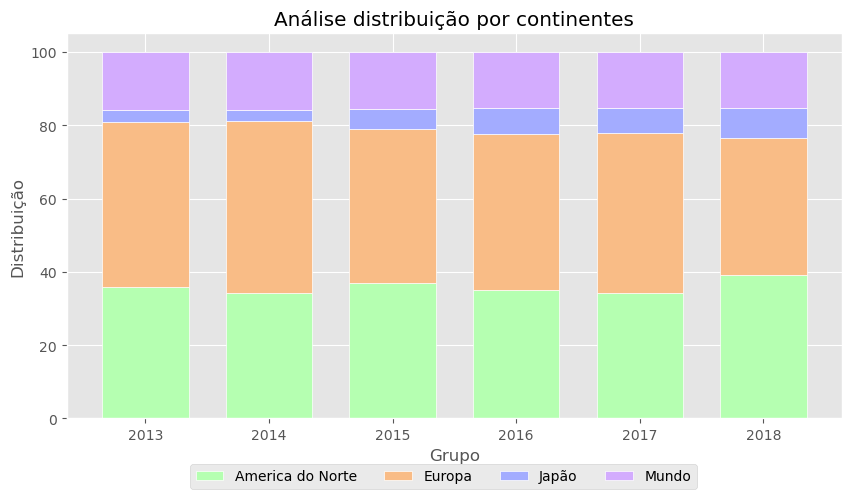

In [150]:
plt.figure(figsize=(10,5))
plt.title('Análise distribuição por continentes')

Largura_Barra = 0.70
Rotulos = Analise2
Grupos = [2013,2014,2015,2016,2017,2018]

plt.bar(Grupos, America, width=Largura_Barra, color='#b5ffb1', edgecolor='white')
plt.bar(Grupos, Europa, bottom=America, width=Largura_Barra, color='#f9bc86', edgecolor='white')
plt.bar(Grupos, Japan, bottom= [ A+B for A,B in zip(America, Europa) ], width=Largura_Barra, color='#a3acff', edgecolor='white')
plt.bar(Grupos, Mundo, bottom= [ A+B+C for A,B,C in zip(America, Europa, Japan) ], width=Largura_Barra, color='#d3acfe', edgecolor='white')

plt.xlabel('Grupo')
plt.ylabel('Distribuição')

plt.legend(['America do Norte', 'Europa', 'Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15,-0.1), ncol=4)

In [83]:
Base_Dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [104]:
from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()

Base_Dados['Produtor'] = Funcao_Label.fit_transform(Base_Dados['Publisher'])
Base_Dados['Genero'] = Funcao_Label.fit_transform(Base_Dados['Genre'])
Base_Dados['Jogo'] = Funcao_Label.fit_transform(Base_Dados['Game'])


Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [105]:
Paleta_Cores = sns.color_palette('husl',8)
Paleta_Cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.96038885399407, 0.3814317878772117, 0.8683117650835491)]

Text(0.5, 1.0, 'Análise dos produtores de jogos (mi)')

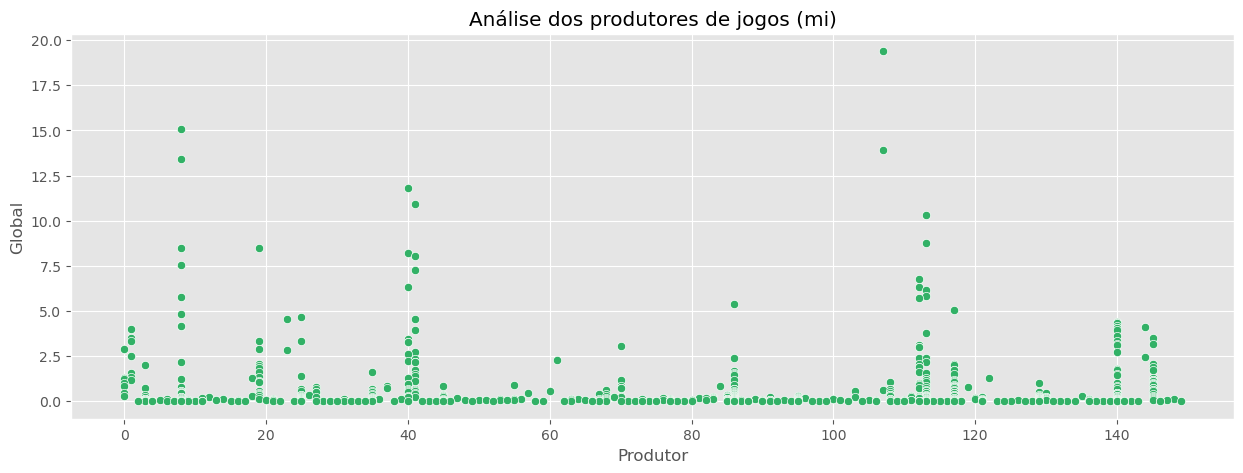

In [144]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=Base_Dados, x='Produtor', y='Global', color=Paleta_Cores[3])
plt.title('Análise dos produtores de jogos (mi)')

Text(0.5, 1.0, 'Análise dos generos dos jogos (mi)')

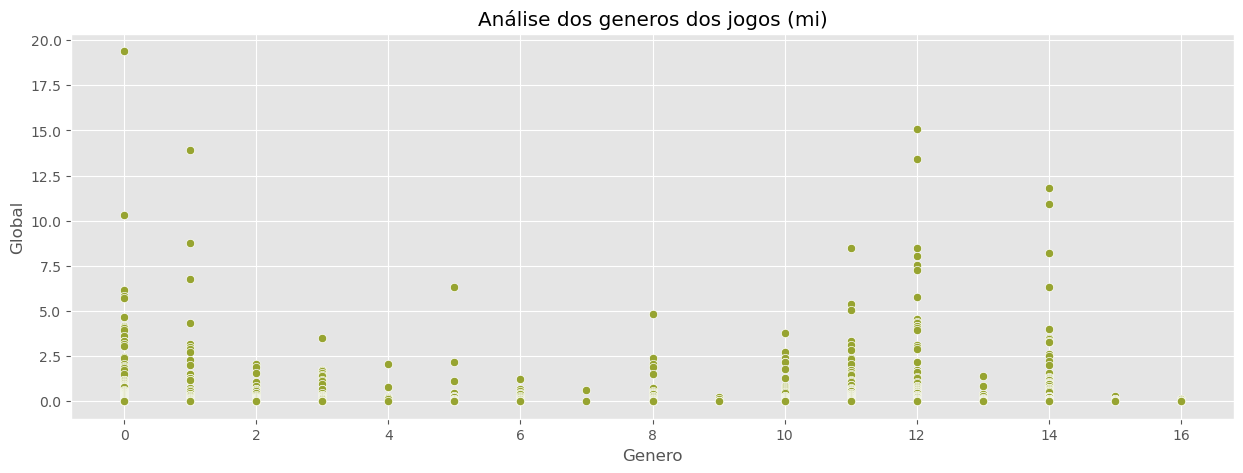

In [145]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=Base_Dados, x='Genero', y='Global', color=Paleta_Cores[2])
plt.title('Análise dos generos dos jogos (mi)')

Text(0.5, 1.0, 'Análise dos games (mi)')

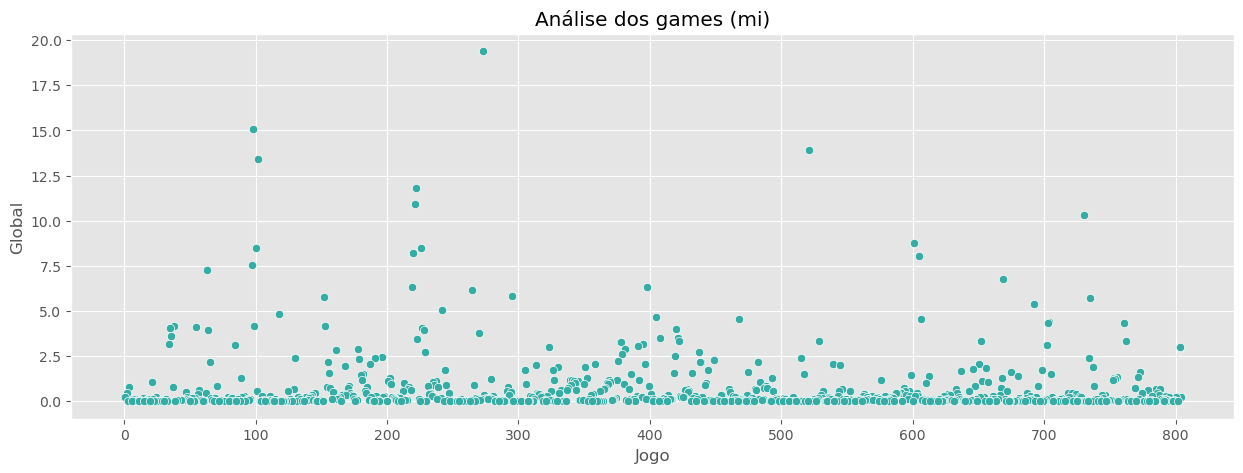

In [147]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=Base_Dados, x='Jogo', y='Global', color=Paleta_Cores[4])
plt.title('Análise dos games (mi)')

In [151]:
Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [166]:
Base_Dados.columns

Index(['Game', 'Year', 'Genre', 'Publisher', 'North America', 'Europe',
       'Japan', 'Rest of World', 'Global', 'Produtor', 'Genero', 'Jogo'],
      dtype='object')

In [173]:
Base_Dados.loc[Base_Dados['Publisher'] == "Rockstar Games"]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,273,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
2,Red Dead Redemption 2,2018.0,273,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
197,L.A. Noire,2017.0,273,Rockstar Games,0.18,0.32,0.00,0.10,0.60,107,2,337


In [180]:
Base_Dados.loc[Base_Dados['Jogo'] == 273]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,273,Rockstar Games,6.06,9.71,0.6,3.02,19.39,107,0,273
